In [1]:
import csv
import numpy as np
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir,'..'))
import matplotlib.pyplot as plt
from src import *
sys.path.append(os.path.join(current_dir,'..','params'))
from load_params import *



In [2]:
# Ecostress simulation eval
ds_xyz = read_csv(os.path.join(current_dir,'..','Simulation','xyz_ColorCheck.csv'))
ds_rho_s2a = read_csv(os.path.join(current_dir,'..','Simulation','rho_ColorCheck_S2A.csv'))
ds_rho_s2b = read_csv(os.path.join(current_dir,'..','Simulation','rho_ColorCheck_S2B.csv'))
ds_rho_s2 = [ds_rho_s2a,ds_rho_s2b]
s2_bnames = ['B4','B3','B2']
xyz_names = ['X','Y','Z']
sensor_names = ['S2A','S2B']
    
def s2_to_xyz(ds_s2,matrix):
    s2_bnames = ['B4','B3','B2']
    A = np.empty([len(ds_s2['B4']),3],dtype=float)
    for i in range(len(s2_bnames)):
            A[:,i] = ds_s2[s2_bnames[i]]
    B = A @ matrix
    
    return B
             

In [3]:
# Matrice
T_9 = matrix_s2l2ab4b3b2_to_xyzd65_sovdat2019_eq9
T_8_new = matrix_s2l2ab4b3b2_to_xyzd65_sovdat2019_eq8_new
T_8 = matrix_s2l2ab4b3b2_to_xyzd65_sovdat2019_eq8

In [4]:
#XYZ cie
XYZ = np.array([ds_xyz['X'], ds_xyz['Y'], ds_xyz['Z']]).T

#XYZ s2
XYZ_s2A = s2_to_xyz(ds_rho_s2a,T_8_new)
XYZ_s2B = s2_to_xyz(ds_rho_s2b,T_8_new)

In [5]:
#conversion en LAB
def XYZ_to_Lab(XYZ_sim):
    Lab_sim = xyz_d65_to_lab(XYZ_sim)
    L_sim = Lab_sim[:,0]
    a_sim = Lab_sim[:,1]
    b_sim = Lab_sim[:,2]
    return L_sim, a_sim, b_sim

L, a, b =XYZ_to_Lab(XYZ)
L_S2A, a_S2A, b_S2A =XYZ_to_Lab(XYZ_s2A)
L_S2B, a_S2B, b_S2B = XYZ_to_Lab(XYZ_s2B)

def delta(XYZ, XYZ_s2A, XYZ_s2B):
    #différence
    L, a, b =XYZ_to_Lab(XYZ)
    L_S2A, a_S2A, b_S2A =XYZ_to_Lab(XYZ_s2A)
    L_S2B, a_S2B, b_S2B = XYZ_to_Lab(XYZ_s2B)
    Delta_L_S2A = L - L_S2A
    Delta_a_S2A = a - a_S2A
    Delta_b_S2A = b - b_S2A
    Delta_L_S2B = L - L_S2B
    Delta_a_S2B = a - a_S2B
    Delta_b_S2B = b - b_S2B
    return Delta_L_S2A, Delta_a_S2A, Delta_b_S2A, Delta_L_S2B, Delta_a_S2B,Delta_b_S2B
    
Delta_L_S2A, Delta_a_S2A, Delta_b_S2A, Delta_L_S2B, Delta_a_S2B,Delta_b_S2B = delta(XYZ, XYZ_s2A, XYZ_s2B)

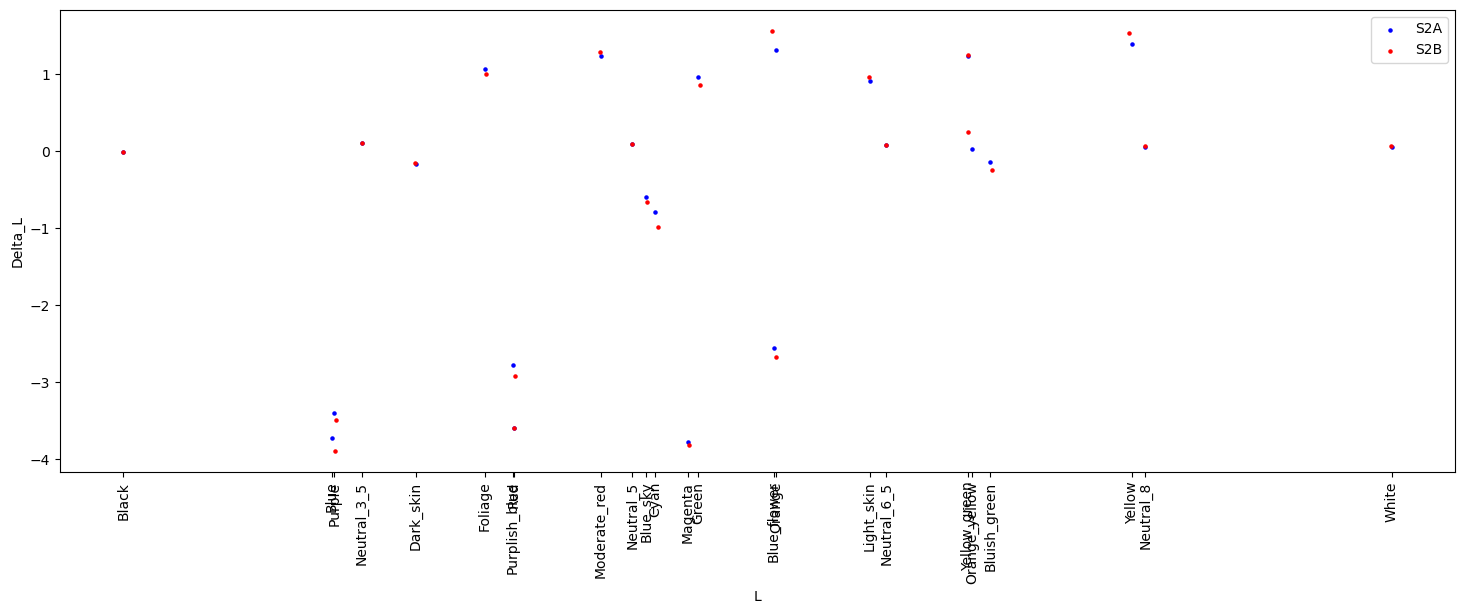

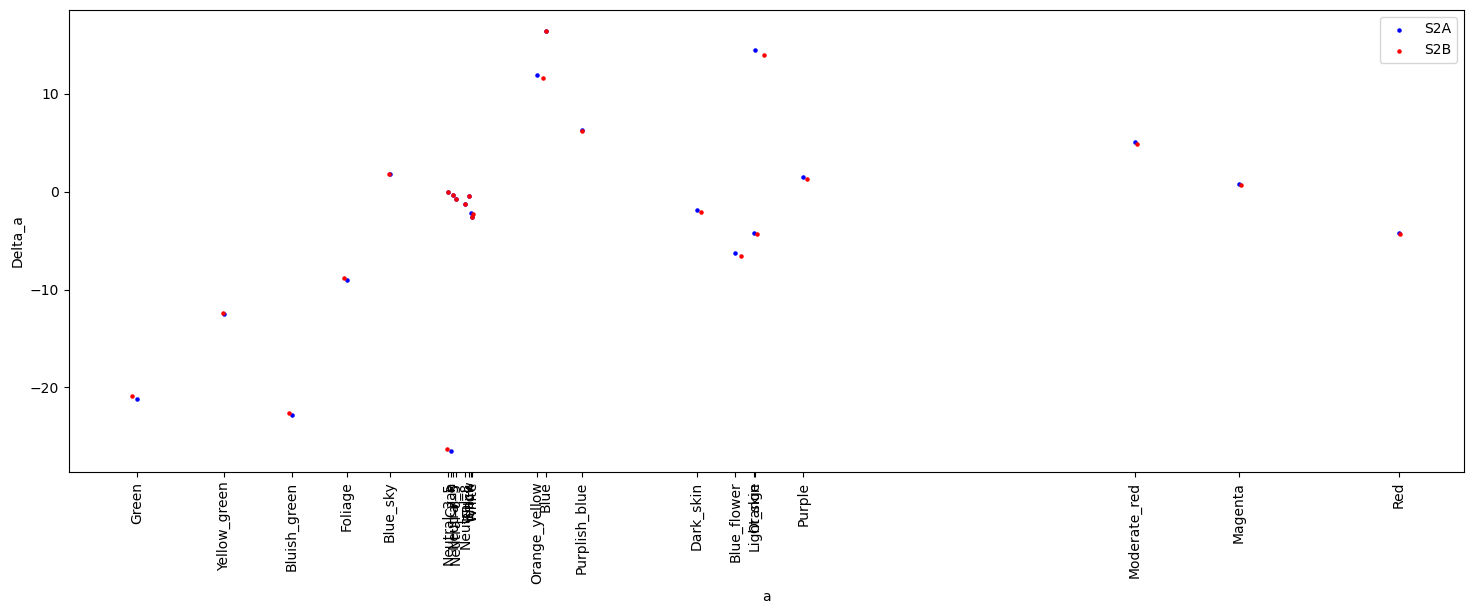

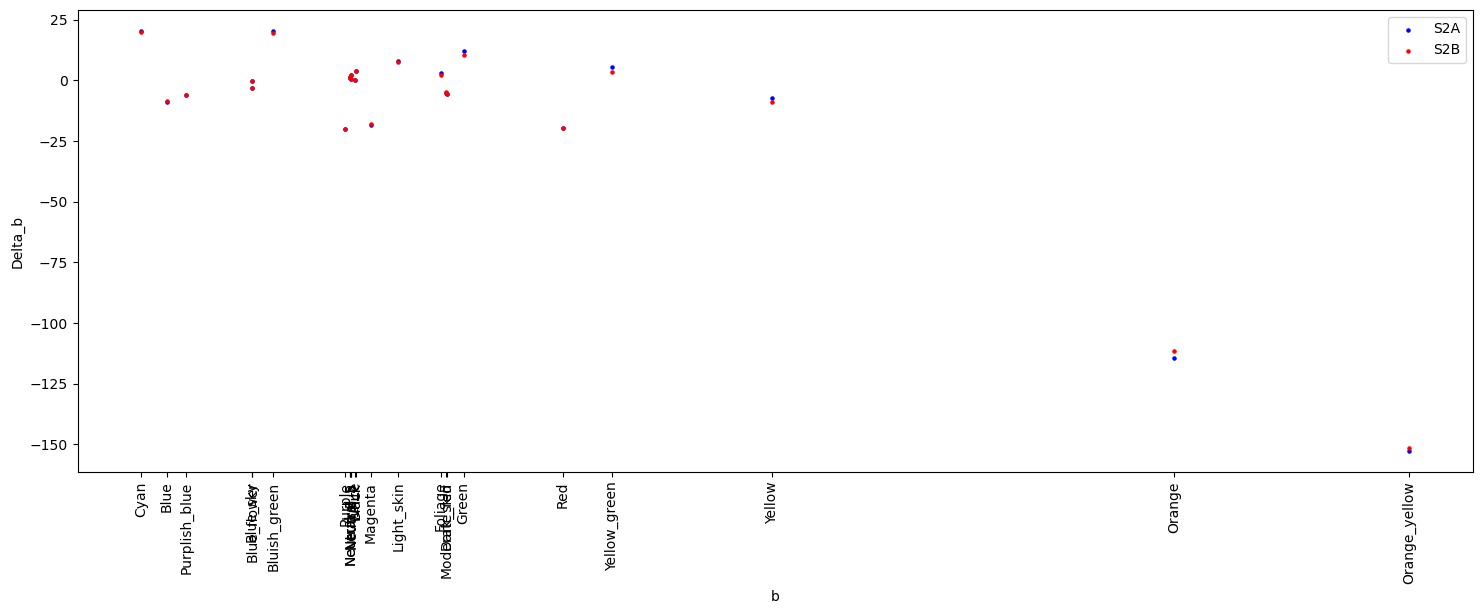

In [23]:
# Fenêtre pour L 
 # Créer une nouvelle figure (fenêtre)
plt.figure(1, figsize=(18,6))
plt.scatter(L_S2A, Delta_L_S2A, color='blue', label ='S2A', s=5)
plt.scatter(L_S2B, Delta_L_S2B, color='red', label ='S2B', s=5)
plt.xlabel('L')
plt.ylabel('Delta_L')
plt.legend()
plt.xticks(ticks=L_S2A, labels=ds_xyz['NAME'], rotation=90)




# Fenêtre pour a 
plt.figure(2, figsize=(18,6))  # Créer une nouvelle figure (fenêtre)
plt.scatter(a_S2A, Delta_a_S2A, color='blue', label ='S2A', s=5)
plt.scatter(a_S2B, Delta_a_S2B, color='red', label ='S2B', s=5)
plt.xlabel('a')
plt.ylabel('Delta_a')
plt.xticks(ticks=a_S2A, labels=ds_xyz['NAME'], rotation=90)
plt.legend()



# Fenêtre pour b
plt.figure(3, figsize=(18,6))  # Créer une nouvelle figure (fenêtre)
plt.scatter(b_S2A, Delta_b_S2A, color='blue', label ='S2A', s=5)
plt.scatter(b_S2A, Delta_b_S2B, color='red', label ='S2B', s=5)
plt.xlabel('b')
plt.ylabel('Delta_b')
plt.xticks(ticks=b_S2A, labels=ds_xyz['NAME'], rotation=90)
plt.legend()

plt.show()


In [11]:
from sklearn.metrics import r2_score

def RMSE(L, a, b, L_S2, a_S2, b_S2):
    # Calcul de l'erreur quadratique moyenne (MSE)
    mse_L = np.mean((L- L_S2)**2)
    mse_a = np.mean((a- a_S2)**2)
    mse_b = np.mean((b- b_S2)**2)
    
    # Racine carrée de l'erreur quadratique moyenne (RMSE)
    rmse_L = np.sqrt(mse_L)
    rmse_a = np.sqrt(mse_a)
    rmse_b = np.sqrt(mse_b)
    return rmse_L, rmse_a, rmse_b

def R2(L, a, b, L_S2, a_S2, b_S2):
    r_squared_L = r2_score(L, L_S2)
    r_squared_a = r2_score(a, a_S2)
    r_squared_b = r2_score(b, b_S2)
    return r_squared_L, r_squared_a, r_squared_b

rmse_LA, rmse_aA, rmse_bA = RMSE(L_S2A, a_S2A, b_S2A, L, a, b)
rmse_LB, rmse_aB, rmse_bB = RMSE(L_S2B, a_S2B, b_S2B,L, a, b)
r_squared_LA, r_squared_aA, r_squared_bA = R2(L_S2A, a_S2A, b_S2A, L, a, b)
r_squared_LA, r_squared_aA, r_squared_bA = R2(L_S2A, a_S2A, b_S2A, L, a, b)
print(RMSE(L_S2A, a_S2A, b_S2A, L, a, b))
print(RMSE(L_S2B, a_S2B, b_S2B, L, a, b))
print(R2(L_S2A, a_S2A, b_S2A, L, a, b, ))
print(R2(L_S2A, a_S2A, b_S2A, L, a, b, ))


RMSE_T8_new =[1.7972201636664273, 10.58486761548026, 40.21656300328411, 1.855809717385786, 10.472276846823185, 39.679344158868176]
R2_T8_new = [0.9901312414583205, 0.7950272966787449, -0.5689344038900201, 0.9901312414583205, 0.7950272966787449, -0.5689344038900201]
RMSE_T8 = [2.309830070604234, 12.151072081617702, 46.85229638426665,2.3376063114368937, 12.10739020674226, 46.377374077957406]
R2_T8 = [0.9822649818031659, 0.5940100620191926, 0.4778131779643583, 0.9822649818031659, 0.5940100620191926, 0.4778131779643583]
RMSE_T9 =[3.520258668916445, 10.788389299593337, 15.97049245501021, 3.469249842175399, 10.631296956204261, 15.757791039012544]
R2_T9 = [0.9632256982963484, 0.7406430509607353, 0.5169476338233718, 0.9632256982963484, 0.7406430509607353, 0.5169476338233718]
RMSE = np.array([RMSE_T8_new,RMSE_T8, RMSE_T9]).T
R2 = np.array([R2_T8_new, R2_T8, R2_T9]).T

(1.7972201636664273, 10.58486761548026, 40.21656300328411)
(1.855809717385786, 10.472276846823185, 39.679344158868176)
(0.9892854951119084, 0.637391603623503, 0.5526686443347721)
(0.9892854951119084, 0.637391603623503, 0.5526686443347721)


In [13]:
#Tableau de comparaison des matrices T 
import pandas as pd


RMSE = pd.DataFrame(RMSE, columns=['T8_new', 'T8', 'T9'], index = ['RMSE_L_S2A', 'RMSE_a_S2A', 'RMSE_b_S2A','RMSE_L_S2B','RMSE_a_S2B','RMSE_b_S2B',])
R2 = pd.DataFrame(R2, columns=['T8_new', 'T8', 'T9'], index = ['R^2_L_S2A', 'R^2_a_S2A', 'R^2_b_S2A','R^2_L_S2B','R^2_a_S2B','R^2_b_S2B'])
print(RMSE)
print(R2)

               T8_new         T8         T9
RMSE_L_S2A   1.797220   2.309830   3.520259
RMSE_a_S2A  10.584868  12.151072  10.788389
RMSE_b_S2A  40.216563  46.852296  15.970492
RMSE_L_S2B   1.855810   2.337606   3.469250
RMSE_a_S2B  10.472277  12.107390  10.631297
RMSE_b_S2B  39.679344  46.377374  15.757791
             T8_new        T8        T9
R^2_L_S2A  0.990131  0.982265  0.963226
R^2_a_S2A  0.795027  0.594010  0.740643
R^2_b_S2A -0.568934  0.477813  0.516948
R^2_L_S2B  0.990131  0.982265  0.963226
R^2_a_S2B  0.795027  0.594010  0.740643
R^2_b_S2B -0.568934  0.477813  0.516948


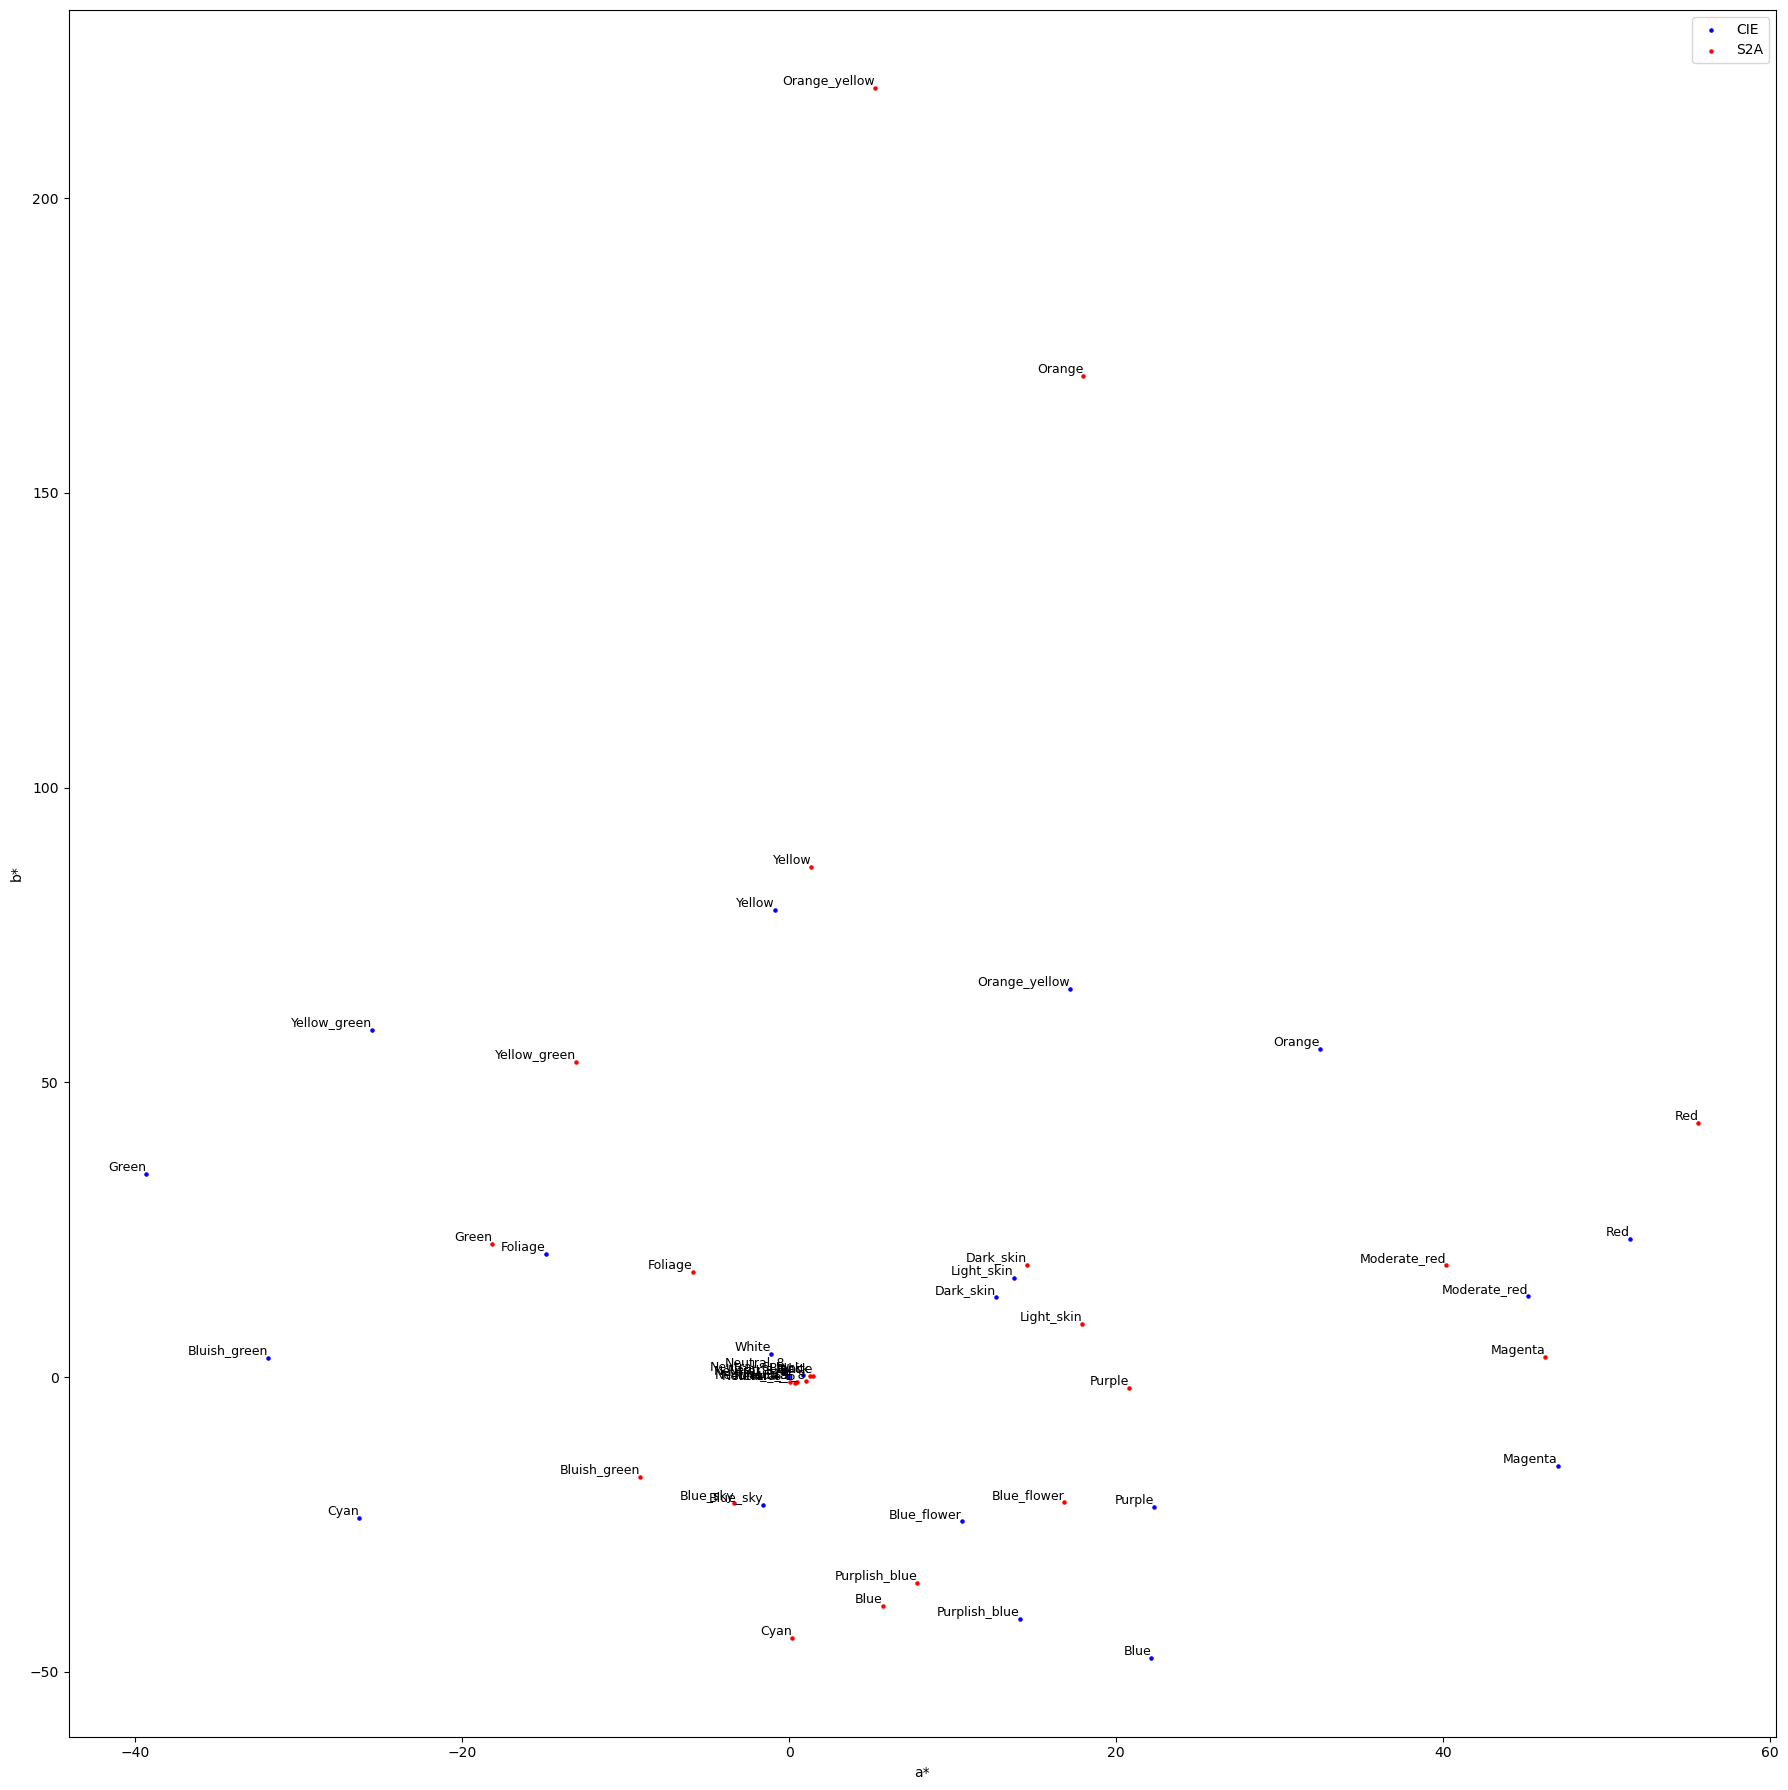

In [22]:
#Espace couleur 

plt.figure(figsize=(18,18))
plt.scatter(a, b, color='blue', label ='CIE', s=5)
plt.scatter(a_S2A, b_S2A, color='red', label ='S2A', s=5)

plt.xlabel('a*')
plt.ylabel('b*')
plt.legend()
for i, label in enumerate(ds_xyz['NAME']):
    plt.text(a[i], b[i], label, fontsize=9, ha='right', va='bottom')
    plt.text(a_S2A[i], b_S2A[i], label, fontsize=9, ha='right', va='bottom')
plt.tight_layout()
plt.show()
